<a href="https://colab.research.google.com/github/aritzeraun/linkedin-skill-assessments-quizzes/blob/master/basic_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Search Algorithms

En esta pequeña práctica vamos a implementar un algoritmo básico de búsqueda en un árbol. La idea es que comencemos a trabajar con los conceptos de node, state expansion y frontier.

Disponemos de la siguiente estructura de datos. Tenemos que partir del origen a O.

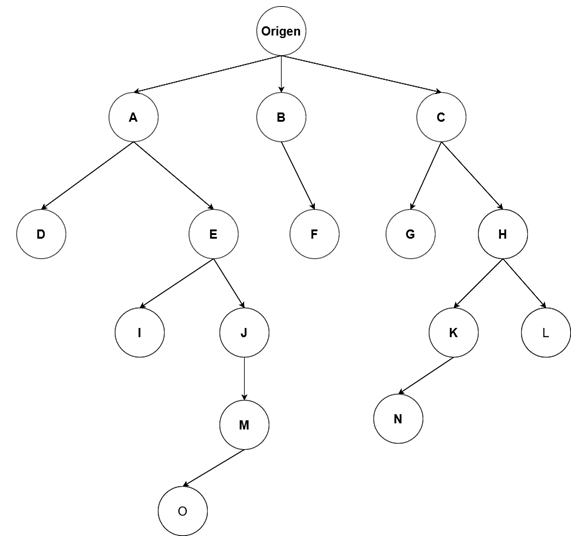

In [47]:
graph = {
  'origen' : ['C','B','A'],
  'A' : ['D', 'E'],
  'E' : ['I', 'J'],
  'J' : ['M'],
  'M' : ['O'],
  'B' : ['F'],
  'C' : ['G', 'H'],
  'H' : ['K', 'L'],
  'K' : ['N'],
  'D' : [],
  'I' : [],
  'O' : [],
  'F' : [],
  'G' : [],
  'N' : [],
  'L' : [],
}

In [12]:
class Node:
    def __init__(self, parent=None, state=None, cost=0, depth=0, action=None):
        self.parent = parent
        self.state = state
        self.cost = cost
        self.depth = depth
        self.action = action

    def set_parent(self, p):
        self.parent = p

    def set_cost(self, c):
        self.cost = c
    
    def set_depth(self, d):
        self.depth = d

    def get_depth(self):
         return self.depth

    def set_action(self, a):
        self.action = a
    

## Tree Search

In [ ]:
def tree_search(graph, start_state, goal_state):
    
    path = []
    frontier = []
    current_depth = 0
    current_cost = 0
    found = False

    start_point = Node(state=start_state)

    start_point.set_action(graph[start_state])
    start_point.set_cost(current_cost+1)
    start_point.set_depth(current_depth)

    frontier.append(start_point)
  
    while not found and frontier:

      current_point = frontier.pop()
      path.append(current_point)

      if current_point.state == goal_state:
        found = True
        break

      else:
        get_sucessors(frontier,current_point, current_cost, current_depth)
    
    if found:
      for element in path:
        print(element.state)

    else:
      print("Path not found")



In [ ]:
def get_sucessors(frontier, current_point, current_cost, current_depth):

      sucessors = current_point.action

      for sucessor in sucessors:
        sucessor_point = Node(state=sucessor)
        sucessor_point.set_parent(current_point.state)
        
        sucessor_point.set_action(graph[sucessor])
        sucessor_point.set_cost(current_cost+1)
        sucessor_point.set_depth(current_depth+1)

        frontier.append(sucessor_point)

In [ ]:
tree_search(graph, "origen", "O")

## BFS

In [ ]:
def bfs_search(graph, start_state, goal_state):
    
    path = []
    frontier = []
    current_depth = 0
    current_cost = 0
    found = False

    start_point = Node(state=start_state)

    start_point.set_action(graph[start_state])
    start_point.set_cost(current_cost+1)
    start_point.set_depth(current_depth)

    frontier.append(start_point)
  
    while not found and frontier:

      current_point = frontier.pop(0)
      path.append(current_point)

      if current_point.state == goal_state:
        found = True
        break

      else:
        get_sucessors(frontier,current_point, current_cost, current_depth)

    if found:
      show_solution(current_point)
      show_path(path)

    else:
      print("Path not found")

In [ ]:
def get_sucessors(frontier, current_point, current_cost, current_depth):
      
      sucessors = current_point.action

      for sucessor in sucessors:
        sucessor_point = Node(state=sucessor)
        sucessor_point.set_parent(current_point)
        #sucessor_point.set_parent(current_point.state)
        
        sucessor_point.set_action(graph[sucessor])
        sucessor_point.set_cost(current_cost+1)
        sucessor_point.set_depth(current_depth+1)

        frontier.append(sucessor_point)

In [ ]:
def show_solution(current_point):
  solution = []
  aux = current_point
  while aux != None:
      solution.append(aux.state)
      aux = aux.parent
  print("SOLUTION")
  print("------------------------")
  for element in reversed(solution):
      print(element)
  print("\n")

In [ ]:
def show_path(path):
  print("PATH")
  print("------------------------")
  for element in path:
      print(element.state)

In [ ]:
bfs_search(graph, "origen", "O")

## DFS

In [ ]:
def dfs_search(graph, start_state, goal_state):
    path = []
    frontier = []
    current_depth = 0
    current_cost = 0
    found = False

    start_point = Node(state=start_state)

    start_point.set_action(graph[start_state])
    start_point.set_cost(current_cost+1)
    start_point.set_depth(current_depth)

    frontier.append(start_point)
  
    while not found and frontier:

      current_point = frontier.pop()
      path.append(current_point)

      if current_point.state == goal_state:
        found = True
        break

      else:
        get_sucessors(frontier,current_point, current_cost, current_depth)

    if found:
      show_solution(current_point)
      show_path(path)

    else:
      print("Path not found")

In [ ]:
def show_solution(current_point):
  solution = []
  aux = current_point
  while aux != None:
      solution.append(aux.state)
      aux = aux.parent
  print("SOLUTION")
  print("------------------------")
  for element in reversed(solution):
      print(element)
  print("\n")

In [ ]:
def show_path(path):
  print("PATH")
  print("------------------------")
  for element in path:
      print(element.state)

In [ ]:
def get_sucessors(frontier, current_point, current_cost, current_depth):
      
      sucessors = current_point.action

      for sucessor in sucessors:
        sucessor_point = Node(state=sucessor)
        sucessor_point.set_parent(current_point)
        #sucessor_point.set_parent(current_point.state)
        
        sucessor_point.set_action(graph[sucessor])
        sucessor_point.set_cost(current_cost+1)
        sucessor_point.set_depth(current_depth+1)

        frontier.append(sucessor_point)

In [ ]:
dfs_search(graph, "origen", "O")

## Iterative deepening search

In [40]:
def ids_search(graph, start_state, goal_state,depthMaximo):
    path = []
    frontier = []
    current_depth = 0
    current_cost = 0
    found = False

    start_point = Node(state=start_state)

    start_point.set_action(graph[start_state])
    start_point.set_cost(current_cost+1)
    start_point.set_depth(current_depth)

    frontier.append(start_point)
  
    while not found and frontier:
      # como hacemos append nos aseguramos que las posiciones más profundas siempre esten al final de la pila
      # no es necesrio realizar un FOR para asegurarse que se priorizan los nodos con mayor profundidad
      current_point = frontier.pop()

      if  current_point.get_depth() <= depthMaximo:
      
        path.append(current_point)

        if current_point.state == goal_state:
          found = True
          break

        else:
          get_sucessors(frontier,current_point, current_cost, current_point.get_depth())
    print("limite actual: "+str(current_point.get_depth()))
    show_path(path)
    if found:
      show_solution(current_point)
    else:
      print("Path not found")

In [5]:
def show_solution(current_point):
  solution = []
  aux = current_point
  while aux != None:
      solution.append(aux.state)
      aux = aux.parent
  print("SOLUTION")
  print("------------------------")
  for element in reversed(solution):
      print(element)
  print("\n")

In [45]:
def show_path(path):
  print("PATH")
  print("------------------------")
  for element in path:
      print(element.state +" limite: "+ str(element.depth))

In [8]:
def get_sucessors(frontier, current_point, current_cost, current_depth):
      
      sucessors = current_point.action

      for sucessor in sucessors:
        sucessor_point = Node(state=sucessor)
        sucessor_point.set_parent(current_point)
        #sucessor_point.set_parent(current_point.state)
        
        sucessor_point.set_action(graph[sucessor])
        sucessor_point.set_cost(current_cost+1)
        sucessor_point.set_depth(current_depth+1)

        frontier.append(sucessor_point)

In [48]:
ids_search(graph, "origen", "O",5)

limite actual: 5
PATH
------------------------
origen limite: 0
A limite: 1
E limite: 2
J limite: 3
M limite: 4
O limite: 5
SOLUTION
------------------------
origen
A
E
J
M
O


